<a href="https://colab.research.google.com/github/Shiva-kalyanaram/Retail_store_weekly_sales_prediction/blob/main/Final_EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [30]:
df_store = pd.read_csv('/content/stores_data_set.csv')
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
df_store['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

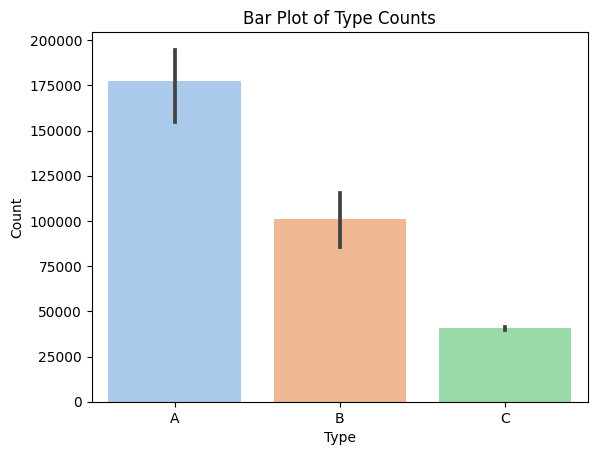

In [9]:
sns.barplot(x=df_store['Type'], y=df_store['Size'], palette='pastel')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Bar Plot of Type Counts')

# Show the plot
plt.show()

It seems Type A size is big while compare to other types B & C.

A    22
B    17
C     6
Name: Type, dtype: int64

In [32]:
df_fea = pd.read_csv('/content/Features_data_set.csv')
df_fea

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [33]:
df_sales = pd.read_csv('/content/sales_data_set.csv')
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [34]:
df_merge = pd.merge(df_store, df_sales, on = 'Store', how = 'left')
df_merge

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [35]:
df = pd.merge(df_merge, df_fea, on = ['Store', 'Date'], how = 'left')
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,B,118221,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,B,118221,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,B,118221,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [3]:
df = pd.read_csv('/content/allstore_clean.csv')


In [4]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,date,year,month,week,Weekly_Sales
0,1,A,151315,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-05-02,2010,May,17,24924.50
1,1,A,151315,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010-12-02,2010,Dec,48,46039.49
2,1,A,151315,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010-02-19,2010,Feb,7,41595.55
3,1,A,151315,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010-02-26,2010,Feb,8,19403.54
4,1,A,151315,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010-05-03,2010,May,18,21827.90


In [17]:
result_counts = df[df['IsHoliday_y'] == True]['date'].value_counts()
date_list = result_counts.index.tolist()

In [25]:
date_list

['2011-11-25',
 '2011-12-30',
 '2012-10-02',
 '2012-07-09',
 '2011-09-09',
 '2010-12-02',
 '2010-12-31',
 '2010-11-26',
 '2011-11-02',
 '2010-10-09']

In [42]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

Getting the data for our use to get the insights

Added new columns like Year, month, week for better insights

In [60]:
df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
date            datetime64[ns]
year                     int64
month                    int64
week                     int64
dtype: object

In [62]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'date', 'year',
       'month', 'week'],
      dtype='object')

In [63]:
re_arrange = ['Store', 'Type', 'Size', 'Dept', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'date', 'year',
       'month', 'week', 'Weekly_Sales']

In [64]:
df = df[re_arrange]

In [26]:
df

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,date,year,month,week,Weekly_Sales
0,1,A,151315,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010-05-02,2010,May,17,24924.50
1,1,A,151315,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2010-12-02,2010,Dec,48,46039.49
2,1,A,151315,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2010-02-19,2010,Feb,7,41595.55
3,1,A,151315,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2010-02-26,2010,Feb,8,19403.54
4,1,A,151315,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,2010-05-03,2010,May,18,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,2012-09-28,2012,Sep,39,508.37
421566,45,B,118221,98,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,2012-05-10,2012,May,19,628.10
421567,45,B,118221,98,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,2012-12-10,2012,Dec,50,1061.02
421568,45,B,118221,98,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,2012-10-19,2012,Oct,42,760.01


In [27]:
mapping_month = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'March',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10: 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [28]:
df['month'] = df['month'].map(mapping_month)

We have successfully added week, month column for our necessary

What was the best month for sales and how much was earned???

In [87]:
best_sales_month_wise=df.groupby('month').sum()['Weekly_Sales'].sort_values(ascending = False)
print(best_sales_month_wise)

month
Apr      6.453239e+08
May      6.056966e+08
Oct      6.029189e+08
Dec      5.990761e+08
Jul      5.933139e+08
Sep      5.905323e+08
Jun      5.750180e+08
Aug      5.642317e+08
March    5.534864e+08
Feb      5.220257e+08
Nov      4.591693e+08
Jan      4.264263e+08
Name: Weekly_Sales, dtype: float64


<ipython-input-87-dac6b8e7d852>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sales_month_wise=df.groupby('month').sum()['Weekly_Sales'].sort_values(ascending = False)


<ipython-input-88-ee86a26f402c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = df.groupby('month').sum().index, y = df.groupby('month').sum()['Weekly_Sales'])
<ipython-input-88-ee86a26f402c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = df.groupby('month').sum().index, y = df.groupby('month').sum()['Weekly_Sales'])


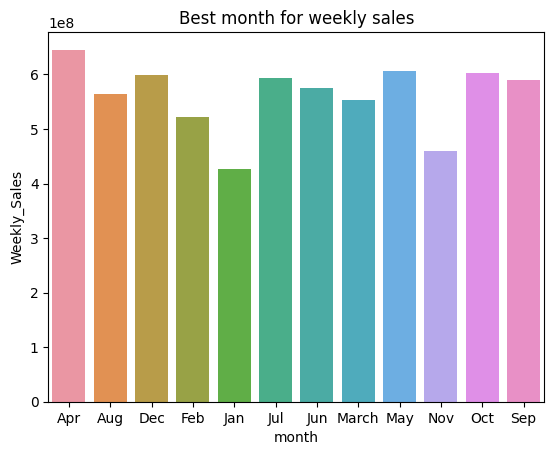

In [88]:
sns.barplot(x = df.groupby('month').sum().index, y = df.groupby('month').sum()['Weekly_Sales'])
plt.xlabel = 'Month'
plt.ylabel = 'weekly_sales'
plt.title('Best month for weekly sales')
plt.show()

Top sales on ⁉

1. April
2. May
3. Oct
4. Dec


Lets see why those months had high sales----- and other information as follow

**Which store had high weekly sales ??**

In [92]:
df.groupby(['Type', 'Weekly_Sales'])['Weekly_Sales'].sum()

Type  Weekly_Sales
A     -4988.94         -4988.94
      -1321.48         -1321.48
      -1098.00         -3294.00
      -898.00           -898.00
      -863.00           -863.00
                        ...    
C      108517.42      108517.42
       110003.37      110003.37
       110379.12      110379.12
       110668.40      110668.40
       112152.35      112152.35
Name: Weekly_Sales, Length: 380191, dtype: float64

In [94]:
df.to_csv('allstore_clean.csv', index=False)


Which type of store had high number of sales:

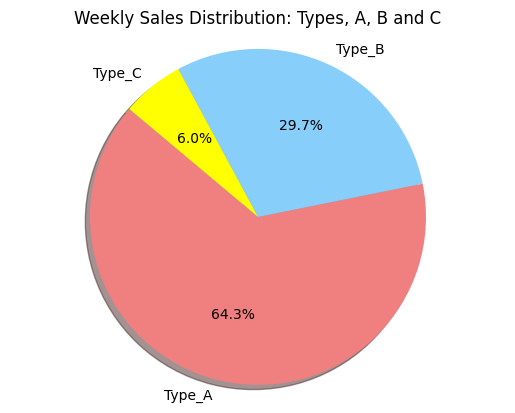

In [32]:
Type_A = df[df['Type'] == 'A']['Weekly_Sales'].sum()
Type_B = df[df['Type'] == 'B']['Weekly_Sales'].sum()
Type_C = df[df['Type'] == 'C']['Weekly_Sales'].sum()


# Create a pie chart
labels = ['Type_A', 'Type_B', 'Type_C']
sizes = [Type_A, Type_B, Type_C]
colors = ['lightcoral', 'lightskyblue', 'yellow']
# explode = (0.1, 0)  # Explode the first slice (Holiday) for emphasis

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Weekly Sales Distribution: Types, A, B and C')
plt.show()

**Which Type had high number of Sales**

In [8]:
df

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,date,year,month,week,Weekly_Sales
0,1,A,151315,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010-05-02,2010,May,17,24924.50
1,1,A,151315,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2010-12-02,2010,Dec,48,46039.49
2,1,A,151315,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2010-02-19,2010,Feb,7,41595.55
3,1,A,151315,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2010-02-26,2010,Feb,8,19403.54
4,1,A,151315,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,2010-05-03,2010,May,18,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,2012-09-28,2012,Sep,39,508.37
421566,45,B,118221,98,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,2012-05-10,2012,May,19,628.10
421567,45,B,118221,98,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,2012-12-10,2012,Dec,50,1061.02
421568,45,B,118221,98,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,2012-10-19,2012,Oct,42,760.01


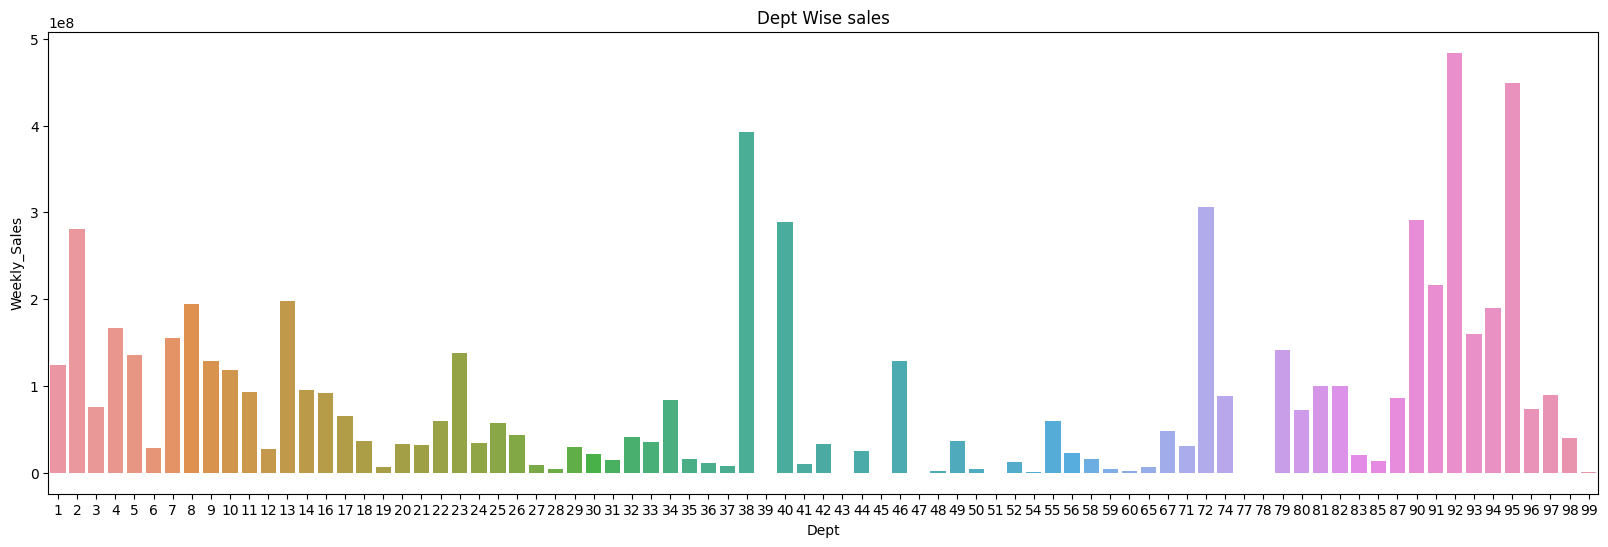

In [23]:
plt.figure(figsize=(20, 6))
sns.barplot(x = dep_wise_sale.index, y = df.groupby(['Dept'])['Weekly_Sales'].sum().sort_values(ascending = False))
plt.title('Dept Wise sales')
plt.show()

**From this, we can see that the department 92 had high sales.**

**Lets see the sales range in Holidays and Non Holidays**

In [24]:
df.groupby(['IsHoliday_y'])['Weekly_Sales'].sum()

IsHoliday_y
False    6.231919e+09
True     5.052996e+08
Name: Weekly_Sales, dtype: float64

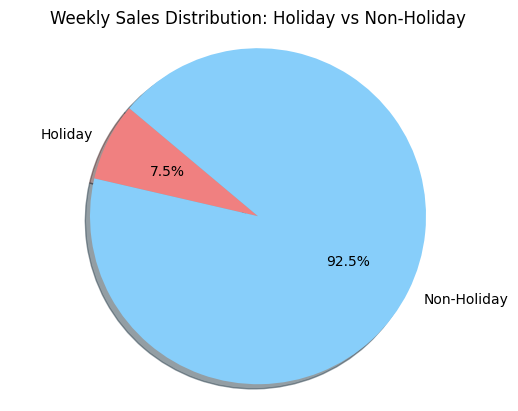

In [28]:
holiday_sales = df[df['IsHoliday_y'] == 1]['Weekly_Sales'].sum()
non_holiday_sales = df[df['IsHoliday_y'] == 0]['Weekly_Sales'].sum()

# Create a pie chart
labels = ['Holiday', 'Non-Holiday']
sizes = [holiday_sales, non_holiday_sales]
colors = ['lightcoral', 'lightskyblue']
# explode = (0.1, 0)  # Explode the first slice (Holiday) for emphasis

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday')
plt.show()

**It seems that, the weekly sales price was more on Non-Holiday days. So, customers used this store on Non Holiday stores. Also, we need to look down any Mark down were gone on those Non Holidays for better insights**

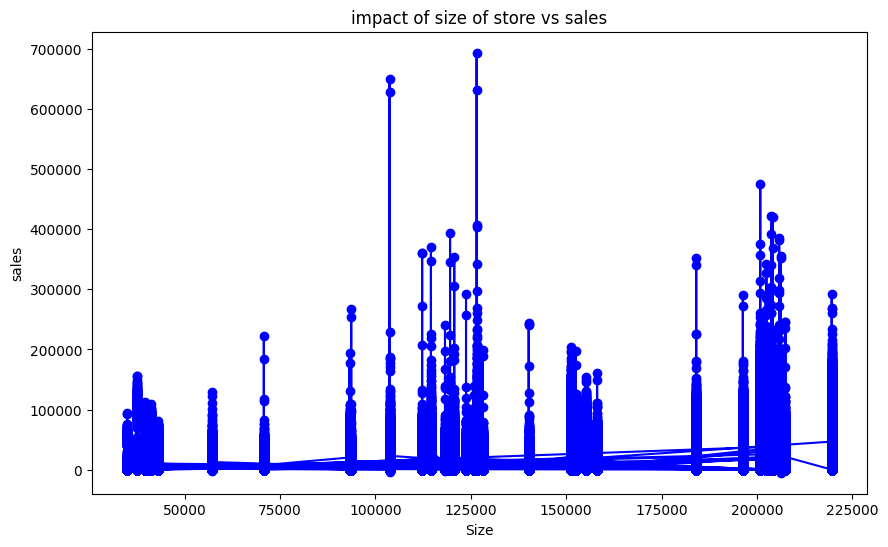

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Weekly_Sales'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('impact of size of store vs sales')
plt.xlabel('Size')
plt.ylabel('sales')
plt.show()

In [54]:
grouped_data = df.groupby(['Type', 'week'])['Weekly_Sales'].sum().reset_index()

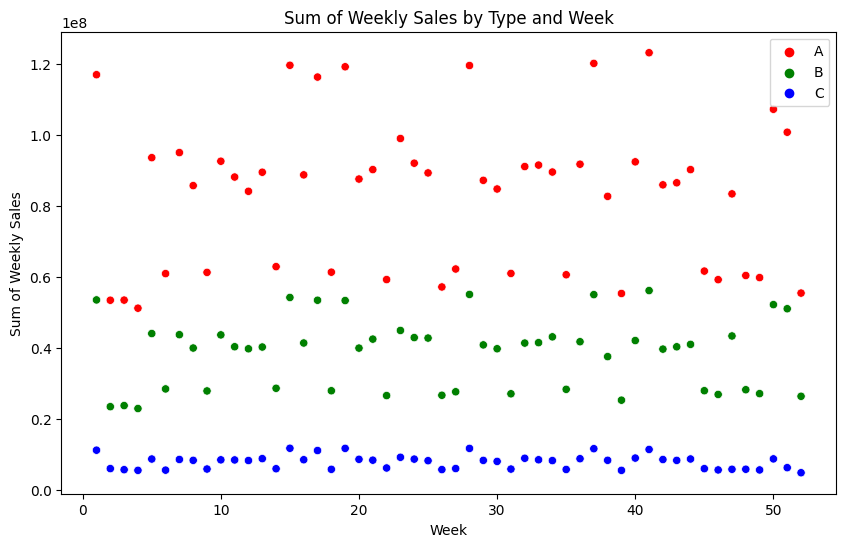

In [48]:
# Create a scatter plot with different colors for each 'Type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='week', y='Weekly_Sales', hue='Type', data=grouped_data, palette={'A': 'red', 'B': 'green', 'C': 'blue'})

# Adding labels and title
plt.title('Sum of Weekly Sales by Type and Week')
plt.xlabel('Week')
plt.ylabel('Sum of Weekly Sales')
plt.legend()

# Display the plot
plt.show()

In [64]:
temp= df[df['Weekly_Sales']> 19403.54].groupby(['Type', 'Temperature'])['Weekly_Sales'].max().sort_values(ascending = False).reset_index()

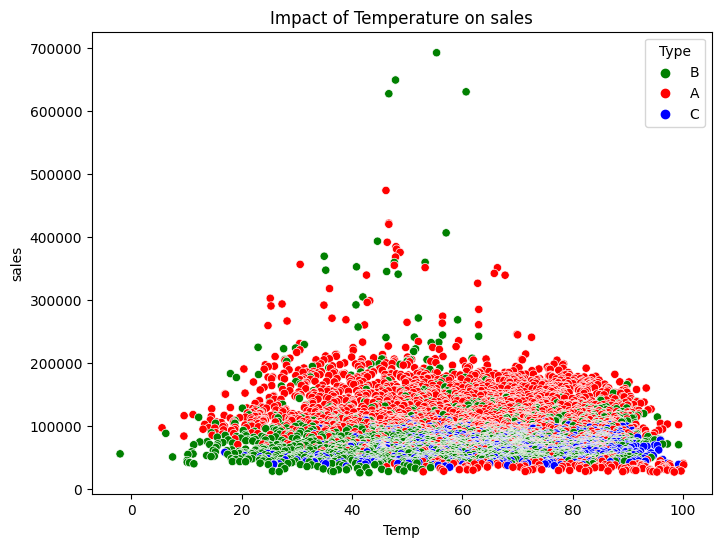

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', hue = 'Type', data = temp, palette={'A': 'red', 'B': 'green', 'C': 'blue'})
plt.title('Impact of Temperature on sales')
plt.xlabel('Temp')
plt.ylabel('sales')
plt.show()

In [5]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,date,year,month,week,Weekly_Sales
0,1,A,151315,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-05-02,2010,May,17,24924.50
1,1,A,151315,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010-12-02,2010,Dec,48,46039.49
2,1,A,151315,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010-02-19,2010,Feb,7,41595.55
3,1,A,151315,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010-02-26,2010,Feb,8,19403.54
4,1,A,151315,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010-05-03,2010,May,18,21827.90


In [18]:
result = df[df['Unemployment']>6.00].groupby(['Type', 'Unemployment']).agg({'Weekly_Sales': 'sum'}).reset_index().sort_values(by='Weekly_Sales', ascending=False)
result

,Type,Unemployment,Weekly_Sales
117,A,8.099,60367370.65
123,A,8.163,49665385.99
66,A,7.441,47110391.28
96,A,7.852,44308794.52
30,A,6.891,43350843.38
...,...,...,...
274,B,7.557,2021262.60
385,C,6.170,1758306.50
436,C,10.199,1741896.51
208,B,6.034,1684307.82


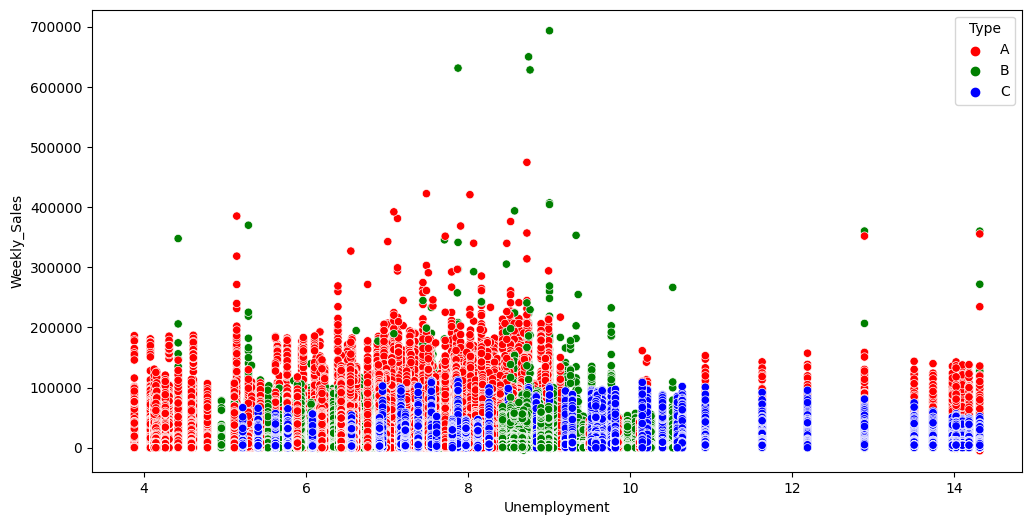

In [27]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Unemployment'], y='Weekly_Sales', hue = 'Type', data=df, palette={'A': 'red', 'B': 'green', 'C': 'blue'})

plt.show()

**Yes, it clearly shows if the Unemployment occurs, there is huge drop on sales. And the range for most occur Unemployment beterrn 5 to 9.5. **




1.   Type B had very less sales according to our data, when Unemployment occurs
2.   Type A had decent sales while comparing to others, hence the overall sales also good for Type A. **bold text**

